In [274]:
# download the dataset
# from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print()
print(type(mnist))
print()
print('train:', mnist.train.num_examples)
print('test:', mnist.test.num_examples)
print('validation:', mnist.validation.num_examples)
print()
print('Shape of training images:', mnist.train.images.shape)
print('Shape of training labels:', mnist.train.labels.shape)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>

train: 55000
test: 10000
validation: 5000

Shape of training images: (55000, 784)
Shape of training labels: (55000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


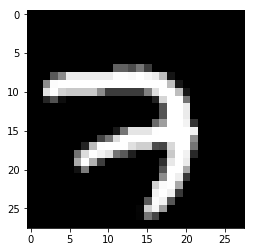

In [279]:
# show the image
import numpy as np
import matplotlib.pyplot as plt

img = mnist.train.images[0]
img = np.reshape(img, (28, 28))

print(mnist.train.labels[0])
plt.imshow(img, cmap=plt.cm.gray) 
plt.show()


In [278]:
#  Preprocessing Character Images
img = mnist.train.images[0]
print(min(img), max(img))

# the values range [0,1]

0.0 0.9960785


Before: (28, 28)


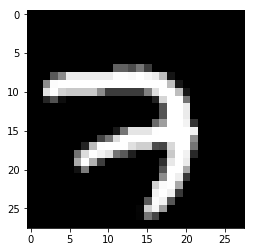

After removing the blank areas: (20, 20)


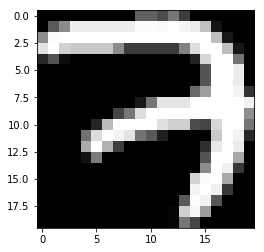

After redo the size: (28, 28)


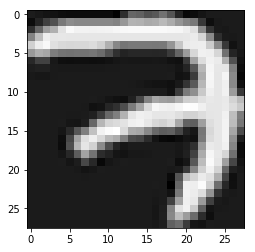

In [280]:
import numpy as np
import cv2

print('Before:', img.shape)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

yu = 0
yd = 0
xu = 0
xd = 0
for i in range(28):
    if max(img[i]) > 0:
        yd = i
    if max(img[-i-1]) > 0:
        yu = -i+27      
    if max(img[:, i]) > 0:
        xd = i
    if max(img[:, -i-1]) > 0:
        xu = -i+27
a = img[yu:yd+1, xu:xd+1]

print('After removing the blank areas:', a.shape)
plt.imshow(a, cmap=plt.cm.gray)
plt.show()

b = cv2.resize(a, (28, 28), interpolation = cv.INTER_CUBIC)
print('After redo the size:', b.shape)
plt.imshow(b, cmap=plt.cm.gray)
plt.show()

In [281]:
def Preprocessing(images):
    print(images.shape)
    new_images = np.zeros(images.shape)
    x = 0
    for img in images:
        img = np.reshape(img, (28, 28))
#         plt.imshow(img, cmap=plt.cm.gray)
#         plt.show()
        yu = 0
        yd = 0
        xu = 0
        xd = 0
        for i in range(28):
            if max(img[i]) > 0:
                yd = i
            if max(img[-i-1]) > 0:
                yu = -i+27      
            if max(img[:, i]) > 0:
                xd = i
            if max(img[:, -i-1]) > 0:
                xu = -i+27
        a = img[yu:yd+1, xu:xd+1]
        b = cv2.resize(a, (28, 28), interpolation = cv.INTER_CUBIC)
        
#         plt.imshow(b, cmap=plt.cm.gray)
#         plt.show()
        b = np.reshape(b, (1, 784))
        
        
        new_images[x] = b
        x += 1
#     print(new_images.shape)
#     plt.imshow(np.reshape(new_images[5], (28,28)), cmap=plt.cm.gray)
#     plt.show()
    
    return new_images
train_x = Preprocessing(mnist.train.images)
test_x = Preprocessing(mnist.test.images)
validation_x = Preprocessing(mnist.validation.images)

(55000, 784)
(10000, 784)
(5000, 784)


In [282]:
from sklearn.decomposition import PCA

print(test_x.shape)
pca = PCA(n_components=10)
N = pca.fit(test_x)
eigenvalues = N.components_
M = pca.transform(test_x)

# print(N.shape)
print(M.shape)
print(eigenvalues.shape)

(10000, 784)
(10000, 10)
(10, 784)


In [294]:
def reducing_dimension(train, test, validation):
    pca = PCA(n_components=10)
    N = pca.fit(train)
    eigenvalues = pca.explained_variance_
    retain_variance = pca.explained_variance_ratio_.sum()*100
    
    M = pca.transform(train)
    print(retain_variance)


reducing_dimension(test_x, test_x, validation_x)

56.68634863266813


In [267]:
dataMat=np.array([[0.9,1],[2.4,2.6],[1.2,2.7],[0.5,0.7],[0.3,0.7],[1.8,1.4],[0.5,0.6],[0.3,0.6],[2.5,2.6],[1.3,1.1]]) 

In [286]:
pca = PCA(n_components=2)  
reduced_X = pca.fit_transform(dataMat)  
  
#结果：  
print('特征值：{}\n特征向量：{}'.format(pca.explained_variance_,pca.components_)) 

特征值：[1.34876344 0.12468101]
特征向量：[[ 0.67764184  0.7353921 ]
 [-0.7353921   0.67764184]]
